In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression


import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [2]:
loans = pd.read_csv('train.csv')

In [3]:
loans = loans.drop('id', 1)
loans = loans.dropna()

#### 6 hypotheses by intuition
- Higher loan amount with higher charged off rate
- Higher interest rate with higher charged off rate
- Lower credit score with higher charged off rate
- Longer term  with higher charged off rate
- Shorter employment year with higher charged off rate
- Lower grade with higher charged off rate

In [4]:
loans.describe()

,loan_amnt,interest_rate,credit_score
count,242150.000000,242150.000000,242150.000000
mean,1520.389009,13.801496,683.575024
std,830.250197,4.588924,29.554795
min,323.797279,5.704849,655.424269
25%,761.954545,10.876086,659.531106
50%,1212.680586,13.543833,678.672563
75%,2152.213330,17.172395,698.591960
max,3851.867974,27.980604,808.551641


#### 1.Higher loan amount with higher charged off rate

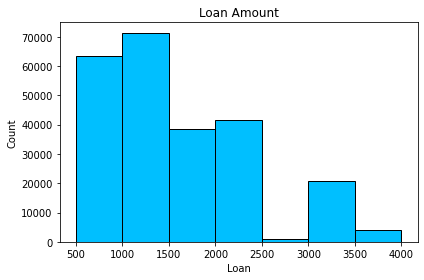

In [5]:
bins = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
plt.hist(loans['loan_amnt'], bins=bins, edgecolor='black', color='deepskyblue')
plt.title('Loan Amount')
plt.xlabel('Loan')
plt.ylabel('Count')

plt.tight_layout()

plt.show()

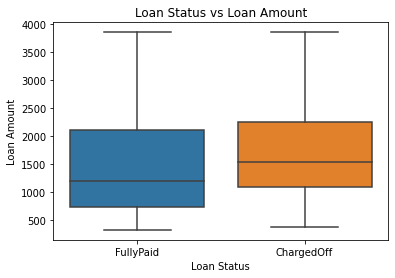

In [6]:
sns.boxplot(x='loan_status',y='loan_amnt',data=loans)

plt.title('Loan Status vs Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

##### There is no big difference between FullyPaid and ChargeOff
##### -> Useless

#### 2.Higher interest rate with higher charged off rate


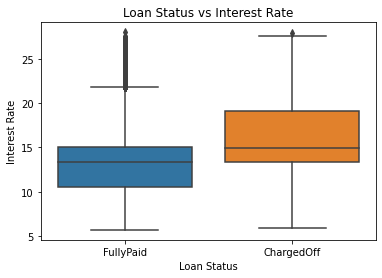

In [7]:
sns.boxplot(x='loan_status',y='interest_rate',data=loans)

plt.title('Loan Status vs Interest Rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

##### Median values between FullyPaid and ChargeOff are different
##### -> Useful

#### 3.Lower credit score with higher charged off rate

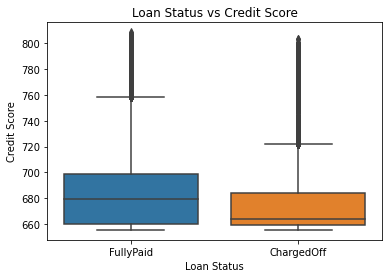

In [8]:
sns.boxplot(x='loan_status',y='credit_score',data=loans)

plt.title('Loan Status vs Credit Score')
plt.xlabel('Loan Status')
plt.ylabel('Credit Score')
plt.show()

##### Median values between FullyPaid and ChargeOff are different
##### -> Useful

#### 4.Longer term  with higher charged off rate

In [9]:
cross_term = pd.crosstab(loans['term'],loans['loan_status'], margins = True)
c_rate = cross_term['ChargedOff'] / cross_term['All']
f_rate = cross_term['FullyPaid'] / cross_term['All']
cross_term['c_rate'] = c_rate
cross_term['f_rate'] = f_rate
cross_term = cross_term.drop(index = ['All'])
cross_term

loan_status,ChargedOff,FullyPaid,All,c_rate,f_rate
term,,,,,
3 years,26894,162993,189887,0.141632,0.858368
5 years,15462,36801,52263,0.295850,0.704150


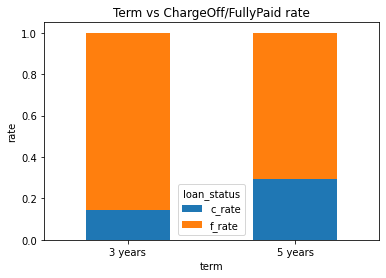

In [10]:
df_bar = cross_term[['c_rate', 'f_rate']]
df_bar.plot.bar(stacked=True)
plt.title('Term vs ChargeOff/FullyPaid rate')
plt.xlabel('term')
plt.xticks(rotation=0)
plt.ylabel('rate')
plt.show()

##### 5 years has higher charged off rate
##### -> useful

#### Shorter employment year with higher charged off rate

In [11]:
cross_el = pd.crosstab(loans['employment_length'], loans['loan_status'], margins = True)
c_rate = cross_el['ChargedOff'] / cross_el['All']
f_rate = cross_el['FullyPaid'] / cross_el['All']
cross_el['c_rate'] = c_rate
cross_el['f_rate'] = f_rate
cross_el = cross_el.drop(index=['All'])
cross_el

loan_status,ChargedOff,FullyPaid,All,c_rate,f_rate
employment_length,,,,,
0 years,3995,15378,19373,0.206215,0.793785
1 year,2380,12761,15141,0.157189,0.842811
10 years,19060,84279,103339,0.184441,0.815559
2 years,3063,12720,15783,0.194070,0.805930
3 years,1938,9357,11295,0.171580,0.828420
4 years,1498,11920,13418,0.111641,0.888359
5 years,2047,10765,12812,0.159772,0.840228
6 years,2235,12580,14815,0.150861,0.849139
7 years,1778,10895,12673,0.140298,0.859702


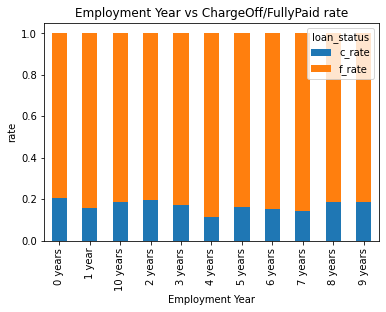

In [12]:
df_bar = cross_el[['c_rate', 'f_rate']]
df_bar.plot.bar(stacked=True)
plt.title('Employment Year vs ChargeOff/FullyPaid rate')
plt.xlabel('Employment Year')
plt.ylabel('rate')
plt.show()

##### There is no big difference 
##### -> Useless

In [13]:
cross_grade= pd.crosstab(loans['grade'], loans['loan_status'], margins = True)
c_rate = cross_grade['ChargedOff'] / cross_grade['All']
f_rate = cross_grade['FullyPaid'] / cross_grade['All']
cross_grade['c_rate'] = c_rate
cross_grade['f_rate'] = f_rate
cross_grade = cross_grade.drop(index = ['All'])
cross_grade

loan_status,ChargedOff,FullyPaid,All,c_rate,f_rate
grade,,,,,
A1,140,5624,5764,0.024289,0.975711
A2,319,5430,5749,0.055488,0.944512
A3,1711,4821,6532,0.261941,0.738059
A4,520,8921,9441,0.055079,0.944921
A5,398,10387,10785,0.036903,0.963097
B1,1737,13747,15484,0.112180,0.887820
B2,2688,13669,16357,0.164333,0.835667
B3,1589,14469,16058,0.098954,0.901046
B4,2255,16154,18409,0.122494,0.877506


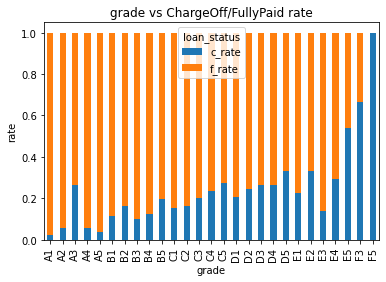

In [14]:
df_bar = cross_grade[['c_rate', 'f_rate']]
df_bar.plot.bar(stacked=True)
plt.title('grade vs ChargeOff/FullyPaid rate')
plt.xlabel('grade')
plt.ylabel('rate')
plt.show()

##### It seems that lower grade with higher charged off rate
##### -> useful

#### Check purpose with charged off rate

In [15]:
cross_purpose= pd.crosstab(loans['purpose'], loans['loan_status'], margins = True)
c_rate = cross_purpose['ChargedOff'] / cross_purpose['All']
f_rate = cross_purpose['FullyPaid'] / cross_purpose['All']
cross_purpose['c_rate'] = c_rate
cross_purpose['f_rate'] = f_rate
cross_purpose = cross_purpose.drop(index = ['All'])
cross_purpose

loan_status,ChargedOff,FullyPaid,All,c_rate,f_rate
purpose,,,,,
car,486,3369,3855,0.126070,0.873930
credit_card,6905,41995,48900,0.141207,0.858793
debt_consolidation,29923,130284,160207,0.186777,0.813223
home_improvement,972,6714,7686,0.126464,0.873536
house,0,4,4,0.000000,1.000000
major_purchase,127,135,262,0.484733,0.515267
medical,857,2297,3154,0.271718,0.728282
other,3000,14633,17633,0.170136,0.829864
small_business,86,363,449,0.191537,0.808463


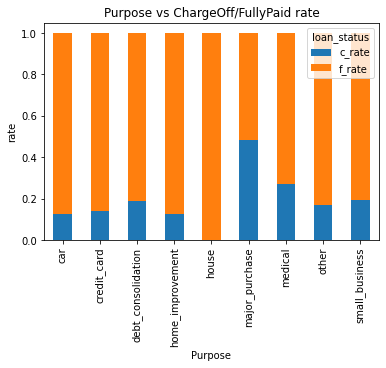

In [16]:
df_bar = cross_purpose[['c_rate', 'f_rate']]
df_bar.plot.bar(stacked=True)
plt.title('Purpose vs ChargeOff/FullyPaid rate')
plt.xlabel('Purpose')
plt.ylabel('rate')
plt.show()

##### We can see the difference between each purpose
##### ->useful

#### Check application type with charged off rate

In [17]:
cross_at= pd.crosstab(loans['application_type'], loans['loan_status'], margins = True)
c_rate = cross_at['ChargedOff'] / cross_at['All']
f_rate = cross_at['FullyPaid'] / cross_at['All']
cross_at['c_rate'] = c_rate
cross_at['f_rate'] = f_rate
cross_at = cross_at.drop(index = ['All'])
cross_at

loan_status,ChargedOff,FullyPaid,All,c_rate,f_rate
application_type,,,,,
Individual,42084,198284,240368,0.175082,0.824918
Joint App,272,1510,1782,0.152637,0.847363


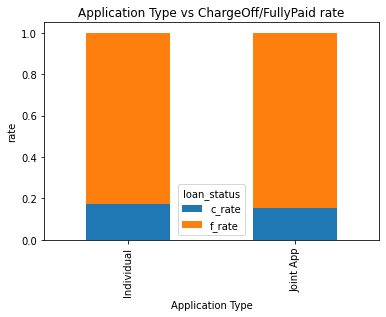

In [18]:
df_bar = cross_at[['c_rate', 'f_rate']]
df_bar.plot.bar(stacked=True)
plt.title('Application Type vs ChargeOff/FullyPaid rate')
plt.xlabel('Application Type')
plt.ylabel('rate')
plt.show()

##### We can see the little difference between each purpose
##### ->useless

In [19]:
X = loans[['term', 'interest_rate', 'grade', 'purpose', 'credit_score']]

In [20]:
X.head(5)

,term,interest_rate,grade,purpose,credit_score
0,3 years,8.421982,A5,debt_consolidation,714.061803
1,5 years,10.286776,B1,credit_card,697.706701
2,3 years,14.723425,C2,debt_consolidation,656.419357
3,3 years,14.260708,C1,credit_card,657.906852
4,5 years,25.217452,E5,debt_consolidation,662.972297


In [21]:
target = loans['loan_status']
target.value_counts()

FullyPaid     199794
ChargedOff     42356
Name: loan_status, dtype: int64

In [22]:
target.head(5)

0     FullyPaid
1    ChargedOff
2     FullyPaid
3     FullyPaid
4     FullyPaid
Name: loan_status, dtype: object

In [23]:
X_dum = pd.get_dummies(X)
target_dum = pd.get_dummies(target)

In [24]:
target_dum

,ChargedOff,FullyPaid
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
242145,0,1
242146,1,0
242147,0,1
242148,0,1


In [25]:
target_dum = target_dum.drop(columns = ['FullyPaid'])

In [26]:
target_dum

,ChargedOff
0,0
1,1
2,0
3,0
4,0
...,...
242145,0
242146,1
242147,0
242148,0


In [27]:
#　stratify:因為Charged of 0/1差太多，等比例分配結果到train, val
X_train,X_val,y_train,y_val = train_test_split(X_dum, target_dum, random_state =0, stratify=target_dum['ChargedOff'])

In [28]:
print(X_train.shape)
print(X_val.shape)

(181612, 40)
(60538, 40)


#### Logistic

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_val)
print(pred)

[0 0 0 ... 0 0 0]


## f1超低＝＝

In [30]:
f_one = f1_score(y_val, pred)
f_one

0.13911307097096262

## Confusion matrix

In [31]:
cm = confusion_matrix(y_val, pred)
cm

array([[49355,   594],
       [ 9753,   836]])

## Adjust thershold

In [32]:
pred_proba = lr.predict_proba(X_val)
proba_df = pd.DataFrame(pred_proba)

proba_df.head(5)

,0,1
0,0.905370,0.094630
1,0.835281,0.164719
2,0.956044,0.043956
3,0.824139,0.175861
4,0.968081,0.031919


In [33]:
chargedoff_val = y_val['ChargedOff'].sum()
print(chargedoff_val)

10589


In [34]:
proba_desc = proba_df[1].sort_values(ascending = False)
proba_desc

43488    0.741101
4336     0.738553
39125    0.732250
10219    0.718169
34653    0.715913
           ...   
2958     0.018803
7929     0.018776
43327    0.018440
46239    0.017945
26280    0.016076
Name: 1, Length: 60538, dtype: float64

In [35]:
threshold = proba_desc.iloc[chargedoff_val]
threshold

0.24843704511850317

In [36]:
def classification(x):
    if x >= threshold:
        return 1

    else:
        return 0

In [37]:
proba_df['class_new'] = proba_df[1].apply(classification)
proba_df.head(5)

,0,1,class_new
0,0.905370,0.094630,0
1,0.835281,0.164719,0
2,0.956044,0.043956,0
3,0.824139,0.175861,0
4,0.968081,0.031919,0


In [38]:
f_one_2 = f1_score(y_val, proba_df['class_new'])
f_one_2

0.3466641484489353

In [39]:
cm2 = confusion_matrix(y_val, proba_df['class_new'])
cm2

array([[43030,  6919],
       [ 6918,  3671]])

In [40]:
print(X_train.shape)

train = pd.concat([X_train, y_train], axis = 1)
print(train.shape)

(181612, 40)
(181612, 41)


In [41]:
train.head(5)

,interest_rate,credit_score,term_3 years,term_5 years,grade_A1,grade_A2,grade_A3,grade_A4,grade_A5,grade_B1,...,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,ChargedOff
146249,14.439098,679.861610,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
60716,14.183422,697.600646,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
171540,15.102605,660.202919,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
58898,11.046900,698.701403,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
103898,10.515072,662.204957,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


#### Downsampling: 平衡0/1的量

In [42]:
fp = train[train['ChargedOff'] == 0 ]
co = train[train['ChargedOff'] == 1 ]

print(co.shape[0])

fp = fp.sample(n = co.shape[0], random_state = 0)

print(fp.shape[0])

31767
31767


In [43]:
train = pd.concat([fp, co])

X_train = train.drop('ChargedOff', 1)
y_train = train['ChargedOff']

In [44]:
X_train

,interest_rate,credit_score,term_3 years,term_5 years,grade_A1,grade_A2,grade_A3,grade_A4,grade_A5,grade_B1,...,grade_F5,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business
29548,8.360948,697.496529,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
160490,7.796785,687.815945,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
184968,11.791191,698.757454,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
158033,7.644710,714.483195,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
225717,8.389246,699.556201,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35346,12.944047,658.645269,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
97427,14.656945,698.978914,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
62513,18.704270,657.095096,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
221429,8.418930,700.603966,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


#### New model

In [45]:
lr2 = LogisticRegression()

lr2.fit(X_train, y_train)
pred2 = lr2.predict(X_val)
pred2

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [46]:
f_one_3 = f1_score(y_val, pred2)
f_one_3

0.37946575794217874

In [47]:
cm3 = confusion_matrix(y_val, pred2)
cm3

array([[31054, 18895],
       [ 3685,  6904]])

In [48]:
print('Accuracy of logistic regression classifier on val set: {:.2f}'.format(lr2.score(X_val, y_val)))

Accuracy of logistic regression classifier on val set: 0.63


#### Loan test.csv

In [49]:
test_loans = pd.read_csv('test.csv')
X_test = test_loans[['term', 'interest_rate', 'grade', 'purpose', 'credit_score']]
X_test_dum = pd.get_dummies(X_test)

## adjust columns

In [51]:
X_test_dum['grade_F3'] = 0
X_test_dum['grade_F5'] = 0
X_test_dum = X_test_dum.drop('purpose_moving', 1)

In [52]:
lr2_pred= lr2.predict(X_test_dum)

In [53]:
output_reg = pd.DataFrame({'id': test_loans.id,
                       'Output': lr2_pred})
output_reg.to_csv('submission_lr2.csv', index=False)